## Отчет по лабораторной работе № 4 по теме: "Изучение функций активации нейронных сетей"
    Цель: Визуализировать функции активации, которые существуют в библиотеке Keras. Для этого необходимо написать собственные методы для вычисления 
    данных функций. Сделать выводы об особенностях функций активации. В нейронных сетях функция активации нейрона определяет выходной сигнал, который 
    определяется входным сигналом или набором входных сигналов. 

###    Linear
    Функция прямой линии, где активация пропорциональна входу (который является взвешенной суммой от нейрона). Такой выбор активационной функции позволяет 
    получать спектр значений, а не только бинарный ответ. При использовании данной функции невозможно прменять метод обратного распространения ошибки. Так как 
    в основе этого метода обучения лежит градиентный спуск, а для того чтобы его найти, нужно взять производную, которая для данной функции активации — константа 
    и не зависит от входных значений. То есть при обновлении весов нельзя сказать улучшается ли эмпирический риск на текущем шаге или нет.
$$
R(z,m) = {z * m}
$$

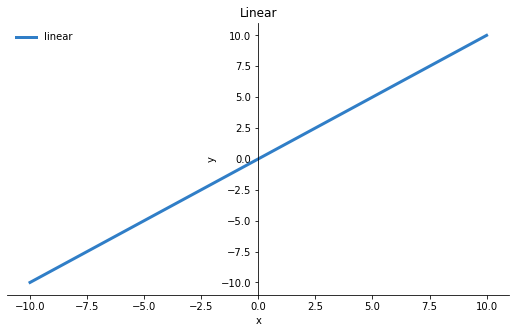

In [3]:
import matplotlib.pyplot as plt
import numpy as np

X_lin = np.arange(-10, 10, .001)
def linear(x,c):
    return c*x

linear1 = linear(X_lin, 1.0)

# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(X_lin, linear1, color="#307EC7", linewidth=3, label="linear")
plt.ylabel('y') 
plt.xlabel('x') 
plt.title("Linear")
ax.legend(loc="upper left", frameon=False)
fig.show()

### Ступенчатая
    Ступенчатая функция является пороговой функцией активации. Эта функция является одной из основных, но при разработке нейронных сетей она широко 
    не используется. Такая функция отлично работает для бинарной классификации, но она не работает, когда для классификации требуется большее число 
    нейронов и количество возможных классов больше двух. 
$$    
f(x) =
\begin{cases}
    1   & \text{if $x>0$,}\\
    -1  & \text{if $\leq0$.}
\end{cases}
$$   

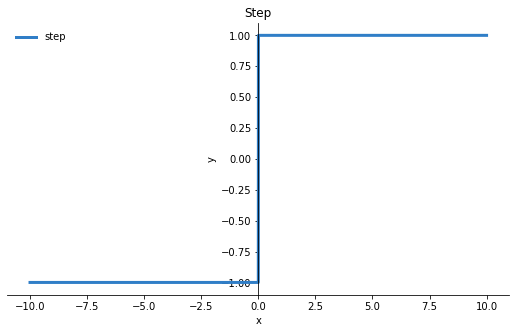

In [4]:
X_lin = np.arange(-10, 10, .001)

def step(arr):
    a = []
    for x in arr:
        if x > 0:
            a.append(1)
        else:
            a.append(-1)
    return a

step1 = step(X_lin)

# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(X_lin, step1, color="#307EC7", linewidth=3, label="step")
plt.ylabel('y') 
plt.xlabel('x') 
plt.title("Step")
ax.legend(loc="upper left", frameon=False)
fig.show()

### Кусочно-линейная
    Кусочно — линейная функция. Имеет два линейных участка, где функция активации тождественно равна минимально допустимому и максимально допустимому 
    значению и есть участок, на котором функция строго монотонно возрастает. 

$$    
f(x) =    
\begin{cases}1     
  & \text{if $x\geq a$,}\\
  x & \text{if $-a < x < a$,}\\
  -1 & \text{if $x\leq-a$.}  
\end{cases}
$$                                  

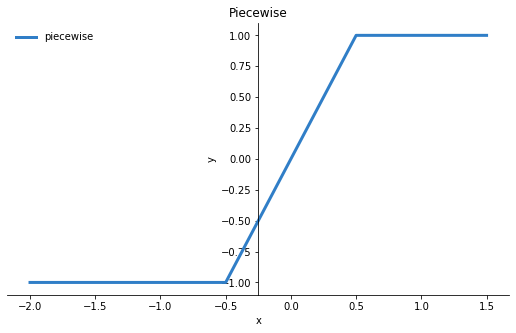

In [11]:
X_step_line = np.arange(-2, 2, .5)

def step_line(arr, c):
    a = []
    for x in arr:
        if x >= c:
            a.append(1)
        elif x <= -c:
            a.append(-1)
        else: 
            a.append(x)
    return a

c = 0.5
step_line1 = step_line(X_step_line, c)

# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
plt.ylabel('y') 
plt.xlabel('x') 
plt.title("Piecewise")
ax.plot(X_step_line, step_line1, color="#307EC7", linewidth=3, label="piecewise")
ax.legend(loc="upper left", frameon=False)
fig.show()

### Sigmoid
    Sigmoid принимает значение на входе и выводит другое значение в диапазоне от 0 до 1. Исторически сигмоида находила широкое применение, поскольку ее выход хорошо 
    интерпретируется, как уровень активации нейрона: от отсутствия активации (0) до полностью насыщенной активации (1). С ней легко работать, и он обладает
    всеми необходимыми свойствами функций активации: он нелинейный, непрерывно дифференцируемый, монотонный и имеет фиксированный диапазон выходных данных. Sigmoid 
    эквивалентен двухэлементному Softmax, где предполагается, что второй элемент равен нулю.
* Плюсы: Какими бы ни были входные значения (действительные числа), функция возвращает выходные данные в диапазоне (0, 1). Плавность функции не выходит за пределы 
    градиента и обеспечивает лучшие результаты оптимизации.
* Минусы: Когда входные значения очень высокие или очень низкие, функция становится линейной. Эта линейность приводит к нулевому 
    градиенту. Страдает исчезающим градиентом. По мере увеличения глубины сети градиенты приближаются к 0 во время обратного распространения.
    
$$
R(z) = \frac{1}{1+e^{-z}}
$$

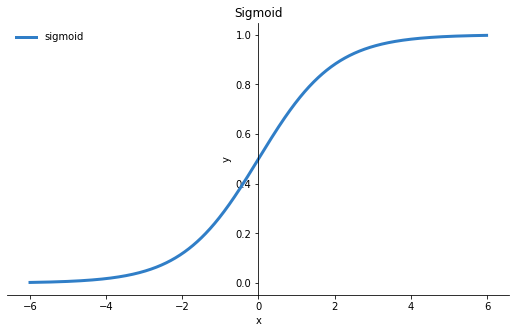

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)  
    return s,ds
x=np.arange(-6,6,0.01)
sigmoid(x)

# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,sigmoid(x)[0], color="#307EC7", linewidth=3, label="sigmoid")
plt.ylabel('y') 
plt.xlabel('x') 
plt.title("Sigmoid")
ax.legend(loc="upper left", frameon=False)
fig.show()

### Softmax
    Основное различие между функцией активации Sigmoid и Softmax заключается в том, что функция Sigmoid используется в двоичной классификации, тогда 
    как Softmax используется в многомерной классификации. Она возвращает вероятность конкретной выборки по отношению к другим выборкам. Эта функция активации
    в основном используется в выходном слое нейронной сети для получения значений вероятности предсказанных классов, при этом целевой класс имеет наивысшую 
    вероятность. Прогнозируемые вероятности равны 1, если сложить их вместе.
* Плюсы: Показывает высокую эффективность в прогнозировании классов в задачах многомерной классификации.
* Минусы: По сравнению с другими функциями активации (которые производят один выход для одного входа), Softmax производит несколько выходов для входного массива.
    Нежелательно использовать в скрытых слоях, потому что функция склонна к потере значимости (когда числа около 0 округляются до 0) и переполнение (числа с 
    большой величиной приближаются к 1). 

$$
f(x_i) = \frac{e^{x_i}}{\sum_{j}e^{x_j}}
$$ 

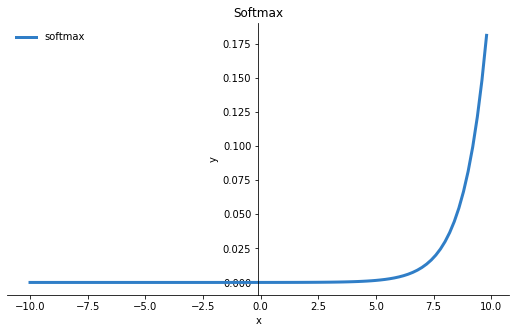

In [20]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10, 10, .2)

def softmax(x):
    return (np.exp(x)/np.sum(np.exp(x)))

softmax1 = softmax(X)

# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
plt.ylabel('y') 
plt.xlabel('x') 
plt.title("Softmax")
ax.plot(X, softmax1, color="#307EC7", linewidth=3, label="softmax")
ax.legend(loc="upper left", frameon=False)
fig.show()


### Tanh
    Гиперболический тангенс является скорректированной формой сигмоида. Cимметричные активационные функции, типа гиперболического тангенса обеспечивают 
    более быструю сходимость, чем стандартная логистическая функция. Функция имеет простую производную, которая может быть вычислена через ее значение, что 
    дает экономию вычислений. Функции активации вроде сигмоидной или тангенциальной являются нелинейными, но приводят к проблемам с затуханием или увеличением 
    градиентов. Вычисление сигмоиды и гиперболического тангенса требует выполнения ресурсоемких операций, таких как возведение в степень. 
* Плюсы: Дает лучшие результаты, чем сигмовидная функция, при работе с многослойными нейронными сетями. Поскольку диапазон функции Tanh равен (-1, 1), выходы 
    центрированы по нулю и имеют более высокую сходимость, сеть работает с нормализованными данными, что приводит к более быстрому обучению.
* Минусы: Хотя Tanh является нулевой центрированной функцией, она все еще страдает от исчезающего градиента во время обратного распространения ошибки.
    Создает несколько мертвых нейронов, когда входное значение равно 0.
    
    
$$
tanh(z) = \frac{e^z-e^{-z}}{e^z+e^{-z}}
$$   

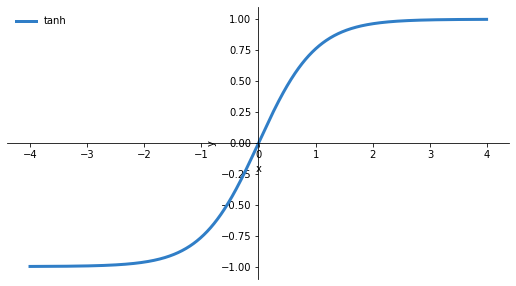

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt
z=np.arange(-4,4,0.01)
tanh(z)[0].size,tanh(z)[1].size
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
plt.ylabel('y') 
plt.xlabel('x') 
ax.plot(z,tanh(z)[0], color="#307EC7", linewidth=3, label="tanh")
ax.legend(loc="upper left", frameon=False)
fig.show()

### ReLU
    Вычисление сигмоиды и гиперболического тангенса требует выполнения ресурсоемких операций, таких как возведение в степень, в то время как ReLU может 
    быть реализован с помощью простого порогового преобразования матрицы активаций в нуле. Производная функции равна либо единице, либо нулю, и поэтому не может 
    произойти разрастания или затухания градиентов, т.к. умножив единицу на дельту ошибки мы получим дельту ошибки, если же мы бы использовали другую функцию, 
    например, гиперболический тангенс, то дельта ошибки могла, либо уменьшиться, либо возрасти, либо остаться такой же, то есть, производная гиперболического 
    тангенса возвращает число с разным знаком и величиной, что можно сильно повлиять на затухание или разрастание градиента. Используется как функция активации 
    по умолчанию в глубоких нейронных сетях.
* Плюсы:Использование данной функции приводит к прореживанию весов. Высокая скорость обучения. Неограниченность верхнего предела позволяет избежать насыщения 
    градиентов во время обучения. Ограниченность снизу вызывает эффекты регуляризации. 
* Минусы:ReLU не всегда достаточно надежна и в процессе обучения может выходить из строя («умирать»). Например, большой градиент, проходящий через ReLU, может 
    привести к такому обновлению весов, что данный нейрон никогда больше не активируется.
$$
f(x) = max(0,x)
$$   

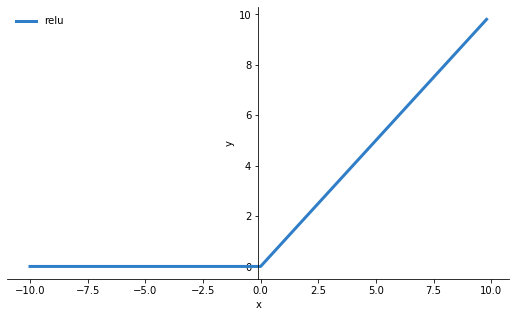

In [14]:
X = np.arange(-10, 10, .2)

def relu(x):
    return np.maximum(0, x)

relu1 = relu(X)

# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
plt.ylabel('y') 
plt.xlabel('x') 
ax.plot(X, relu1, color="#307EC7", linewidth=3, label="relu")
ax.legend(loc="upper left", frameon=False)
fig.show()

### Softplus
    SoftPlus - это плавное приближение к функции ReLU, которое можно использовать для ограничения выхода, чтобы он всегда была положительным. SoftPlus повышает 
    стабильность и производительность архитектуры глубокой нейронной сети за счет плавности и ненулевого градиента. 
* Плюсы:
    Неограниченность в верхнем пределе и ограниченность в нижнем пределе помогает сети избежать насыщения и вызвать регуляризацию.
* Минусы:
    ReLU является более предпочтиельной из-за меньшего количества вычислений.
$$
f(x) = ln(1 + e^x)
$$ 

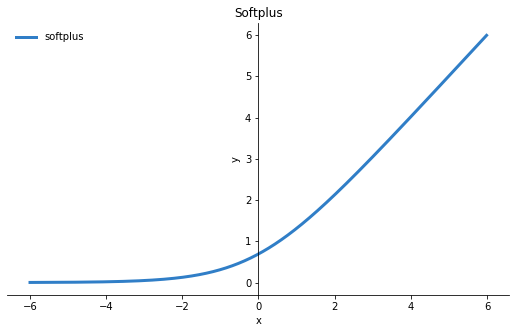

In [15]:
def softplus(x):
    s=(np.log(1+np.exp(x))) 
    ds=1/1+s 
    return s,ds

x=np.arange(-6,6,0.01)

# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
plt.ylabel('y') 
plt.xlabel('x') 
plt.title("Softplus")
ax.plot(x,softplus(x)[0], color="#307EC7", linewidth=3, label="softplus")
ax.legend(loc="upper left", frameon=False)
fig.show()

### ELU
    Экспоненциальная линейная функция. Эта функция, которая, как правило, быстрее сводит затраты к нулю и дает более точные результаты. Функция ELU плавно 
    спадает для значений ниже 0, когда ReLU спадает быстрее. ELU имеет отрицательные значения, что приближает среднее значение активаций к нулю. 
* Плюсы:
    Средние значения активаций, близкие к нулю, обеспечивают более быстрое обучение, поскольку они приближают градиент к естественному градиенту. 
    Время вычислений сравнимо с ReLU.
$$    
f(x) =    
\begin{cases}x     
  & \text{if $x>0$,}\\
  α(e^x-1) & \text{if $x\leq 0$.}
\end{cases}
$$

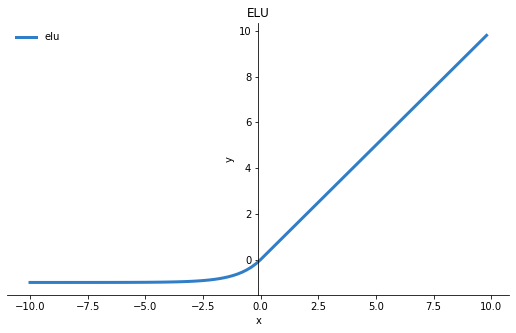

In [16]:
X = np.arange(-10, 10, .2)
def elu(arr, alpha):
    a = []
    for x in arr:
        if x >= 0:
            a.append(x)
        else:
            a.append(alpha * (np.exp(x)-1))
    return a

elu1 = elu(X, 1.0)

# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
plt.ylabel('y') 
plt.xlabel('x') 
plt.title("ELU")
ax.plot(X, elu1, color="#307EC7", linewidth=3, label="elu")
ax.legend(loc="upper left", frameon=False)
fig.show()

### Selu
    Функция активации SELU умножает scale (> 1) на результат функции ELU, чтобы обеспечить наклон больше единицы для 
    положительных входов. Значения alpha и scale выбираются таким образом, чтобы среднее значение и дисперсия входных данных сохранялись между двумя 
    последовательными слоями, пока веса инициализированы правильно. 
* Плюсы:
    Используется в скрытых слоях и может использоваться как альтернатива ReLU. SELU придает нейронным сетям свойство самонормирования. То есть активации 
    нейронов сходятся к нулевому среднему и единичной дисперсии.
* Минусы:
    Требуется больше вычислительной мощности при обучении сети в сравнении с RELU. 
$$    
f(x) =   
\begin{cases} scale * x     
  & \text{if $x\geq 0$,}\\
  scale * alpha * (e^x - 1) & \text{if $x<0$.}
\end{cases}
$$

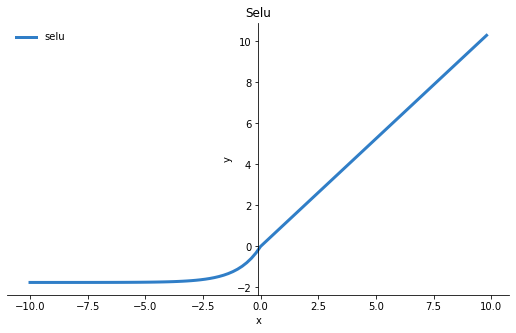

In [17]:
X = np.arange(-10, 10, .2)

def selu(arr, alpha, scale):
    a = []
    for x in arr:
        if x >= 0:
            a.append(scale * x)
        else:
            a.append(scale * alpha * (np.exp(x) - 1))
    return a

selu1 = selu(X, 1.67326324, 1.05070098)

# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
plt.ylabel('y') 
plt.xlabel('x') 
plt.title("Selu")
ax.plot(X, selu1, color="#307EC7", linewidth=3, label="selu")
ax.legend(loc="upper left", frameon=False)
fig.show()

### Softsign
    Альтернатива гиперболическому тангенсу. Несмотря на то, что функции tanh и softsign тесно связаны, tanh сходится экспоненциально, тогда как softtsign 
    сходится полиномиально.
* Плюсы:
    В отличии от tanh нет быстрого насыщения т.е. при больших или низких значениях функция не стремится быть линейной.
* Минусы:
    Создает мертвые нейроны, когда входные значения равны 0. 
$$
f(x) = \frac{x}{|x|+1}
$$   

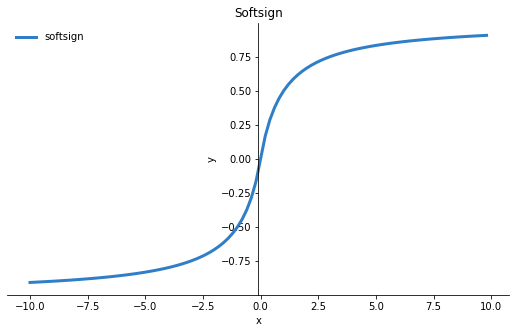

In [18]:
X = np.arange(-10, 10, .2)

def softsign(x):
    return x/(abs(x) + 1)

softsign1 = softsign(X)

# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
plt.ylabel('y') 
plt.xlabel('x') 
plt.title("Softsign")
ax.plot(X, softsign1, color="#307EC7", linewidth=3, label="softsign")
ax.legend(loc="upper left", frameon=False)
fig.show()

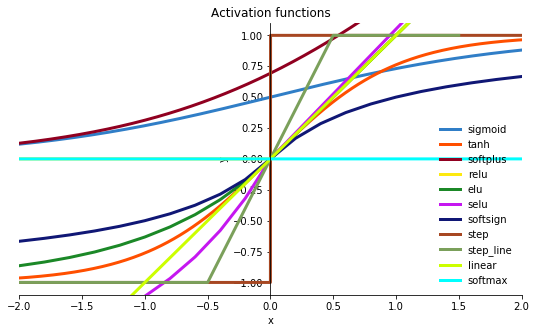

In [21]:
X_step_line = np.arange(-2, 2, .5)

def step_line(arr):
    a = []
    for x in arr:
        if x >= 0.5:
            a.append(1)
        elif x <= -0.5:
            a.append(-1)
        else: 
            a.append(x)
    return a

step_line1 = step_line(X_step_line)
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,sigmoid(x)[0], color="#307ec7", linewidth=3, label="sigmoid")
ax.plot(z,tanh(z)[0], color="#ff4f00", linewidth=3, label="tanh")
ax.plot(x,softplus(x)[0], color="#900020", linewidth=3, label="softplus")
ax.plot(X, relu1, color="#fde910", linewidth=3, label="relu")
ax.plot(X, elu1, color="#1b8827", linewidth=3, label="elu")
ax.plot(X, selu1, color="#c517f0", linewidth=3, label="selu")
ax.plot(X, softsign1, color="#101775", linewidth=3, label="softsign")
ax.plot(X_lin, step1, color="#a74722", linewidth=3, label="step")
ax.plot(X_step_line, step_line1, color="#7ba05b", linewidth=3, label="step_line")
ax.plot(X_lin, linear1, color="#ccff00", linewidth=3, label="linear")
ax.plot(X, softmax1, color="#00ffff", linewidth=3, label="softmax")
plt.ylim([-1.1, 1.1])
plt.xlim([-2, 2])
plt.ylabel('y') 
plt.xlabel('x') 
plt.title("Activation functions")
ax.legend(loc="lower right", frameon=False)
fig.show()

### Вывод
    В ходе работы были изучены доступные в keras функции активации. Так же была выполнена программная реализация методов для построения функций.

In [ ]:
# Литература
https://blog.robofied.com/?s=softmax+
    https://analyticsindiamag.com/the-number-game-behind-advanced-activation-functions-in-machine-learning/
* Keras. Веб-сайт. Layer activation functions. — Режим доступа:[keras.io](https://keras.io/api/layers/activations/),свободный. — Загл. с экрана.
* Wikipedia. Веб-сайт. Activation function. — Режим доступа:[en.wikipedia.org](https://en.wikipedia.org/wiki/Activation_function),свободный. — Загл. с экрана.  
* Wikipedia. Веб-сайт. Математические формулы в LaTeX. — Режим доступа:[ru.wikibooks.org](https://ru.wikibooks.org/wiki/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D1%8B_%D0%B2_LaTeX),свободный. — Загл. с экрана.     
* Habr. Веб-сайт. Сверточная нейронная сеть, часть 1: структура, топология, функции активации и обучающее множество. — Режим доступа:[habr.com](https://habr.com/ru/post/348000/),свободный. — Загл. с экрана.
* Ifmo. Веб-сайт. Практики реализации нейронных сетей. — Режим доступа:[neerc.ifmo.ru](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B8_%D1%80%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9),свободный. — Загл. с экрана.